In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Wrangling

In [4]:
Insurance_fraud = '/Users/jenniferrobbins/Downloads/InsuranceFraud.xlsx'
df = pd.read_excel(Insurance_fraud)
pd.set_option('display.max_columns', 100)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [3]:
df.shape

(11565, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
14,May,4,Thursday,Pontiac,Urban,Monday,May,5,Male,Single,32.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,19,6,400,NaN,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,5906.597313
23,Jan,4,Monday,Honda,Urban,Tuesday,Jan,4,Male,Single,NaN,Third Party,Sedan - Collision,Sedan,20000 to 29000,0,34,2,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,8839.114262
83,May,2,Monday,Pontiac,Urban,Thursday,May,2,Male,Single,NaN,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,0,112,6,400,3.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,6061.026279
2510,Dec,4,Tuesday,Mazda,Urban,Tuesday,Dec,4,Female,Single,33.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,3332,5,400,NaN,more than 30,more than 30,2 to 4,4 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,1141.334386
4659,Oct,1,Sunday,Pontiac,Urban,Monday,Oct,1,Female,Single,39.0,Policy Holder,Sedan - Liability,Sport,less than 20000,0,6227,13,400,NaN,more than 30,more than 30,2 to 4,6 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability,4873.605254
5015,Aug,2,Monday,Honda,Urban,Friday,Aug,2,Male,Single,NaN,Policy Holder,Sedan - All Perils,Sedan,less than 20000,0,6685,4,400,1.0,more than 30,more than 30,2 to 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,1995,All Perils,6887.936616
7374,Sep,1,Thursday,Toyota,Urban,Thursday,Sep,2,Male,Married,61.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,9843,10,400,NaN,more than 30,more than 30,more than 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,1995,Liability,11291.559600
8522,Sep,1,Sunday,Toyota,Urban,Tuesday,Sep,1,Male,Married,NaN,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,11341,11,400,3.0,more than 30,more than 30,none,7 years,51 to 65,No,No,External,none,4 to 8 years,2 vehicles,1996,Collision,3106.304085
9557,Aug,2,Thursday,Mazda,Urban,Tuesday,Aug,3,Male,Single,28.0,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,12741,4,400,NaN,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,1 year,1 vehicle,1996,All Perils,15604.825534
10259,Jan,4,Wednesday,Pontiac,Urban,Friday,Feb,3,Male,Married,NaN,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,13681,15,400,3.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Liability,1923.579892


In [29]:
df['Age'] = df['Age'].fillna(0)
df['DriverRating'] = df['DriverRating'].fillna(0)

In [30]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,11565.0,2.784003,1.284854,1.0,2.000000,3.000000,4.000000,5.000000
WeekOfMonthClaimed,11565.0,2.701167,1.258153,1.0,2.000000,3.000000,4.000000,5.000000
Age,11565.0,39.882317,13.612912,0.0,31.000000,38.000000,49.000000,80.000000
FraudFound_P,11565.0,0.059230,0.236066,0.0,0.000000,0.000000,0.000000,1.000000
PolicyNumber,11565.0,7710.474449,4453.762219,1.0,3851.000000,7712.000000,11542.000000,15420.000000
RepNumber,11565.0,8.469780,4.618952,1.0,4.000000,8.000000,12.000000,16.000000
Deductible,11565.0,407.617812,43.397393,300.0,400.000000,400.000000,400.000000,700.000000
DriverRating,11565.0,2.492175,1.119253,0.0,1.000000,2.000000,3.000000,4.000000
Year,11565.0,1994.865975,0.801798,1994.0,1994.000000,1995.000000,1996.000000,1996.000000
ClaimSize,11565.0,22955.978035,26988.811719,0.0,4148.845001,8130.994563,46299.646944,141394.159289


### Observations
#### - All features except for ClaimSize have a mean almost equal to the median, suggesting the data is normally distributed.
#### - ClaimSize has a median value almost three times smaller than the mean. This suggests a is positively skewed distribution.

#### 


### Below shows a summary the non-numeric features 

In [9]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Month,11565,12,Jan,1056
DayOfWeek,11565,7,Monday,2000
Make,11565,19,Pontiac,2899
AccidentArea,11565,2,Urban,10356
DayOfWeekClaimed,11565,8,Monday,2811
MonthClaimed,11565,13,Jan,1084
Sex,11565,2,Male,9768
MaritalStatus,11565,4,Married,7986
Fault,11565,2,Policy Holder,8394
PolicyType,11565,9,Sedan - Collision,4186


# Exploratory Data Analysis

### Distributions on each of the numeric features in the dataset 

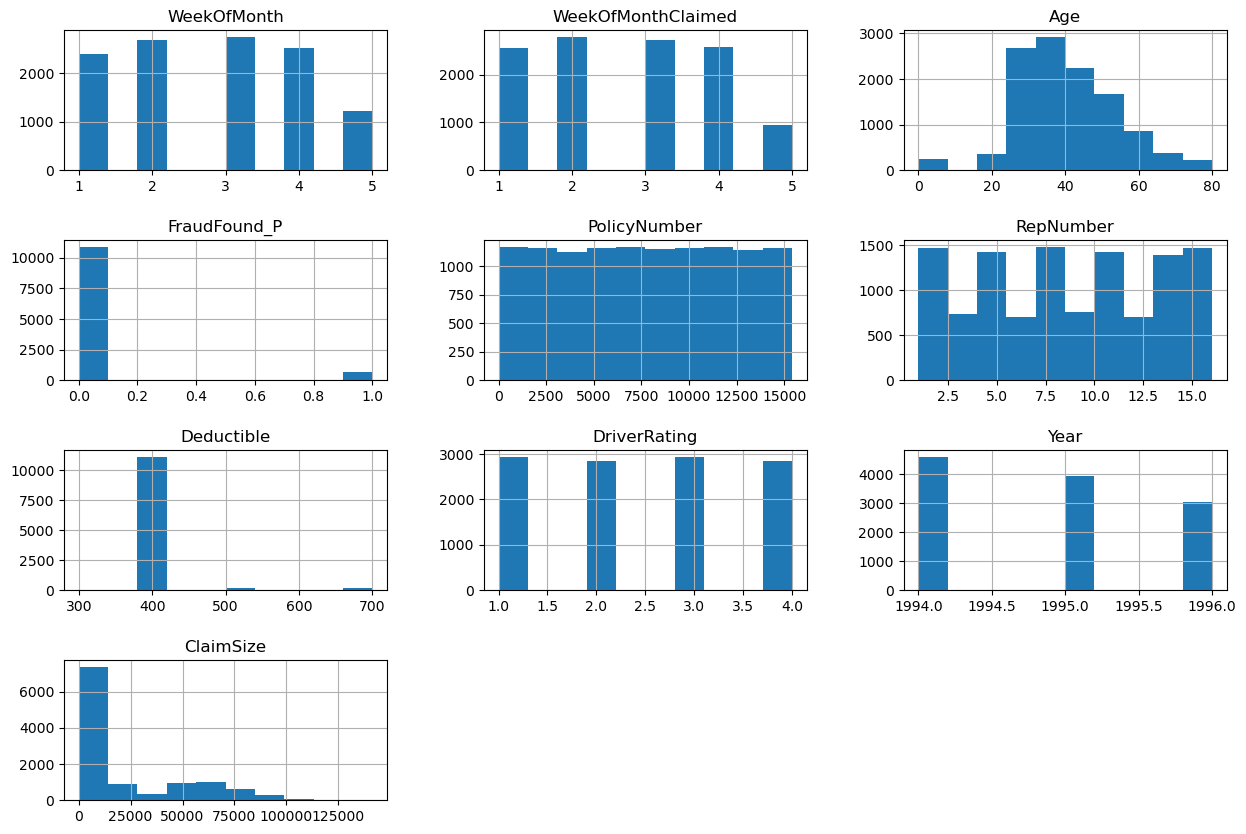

In [10]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Number of fraudulent claims 

In [35]:
def cross_tab(x,y):
    crtab = pd.crosstab(df[x], df[y])
    return crtab

0    10880
1      685
Name: FraudFound_P, dtype: int64


<AxesSubplot:>

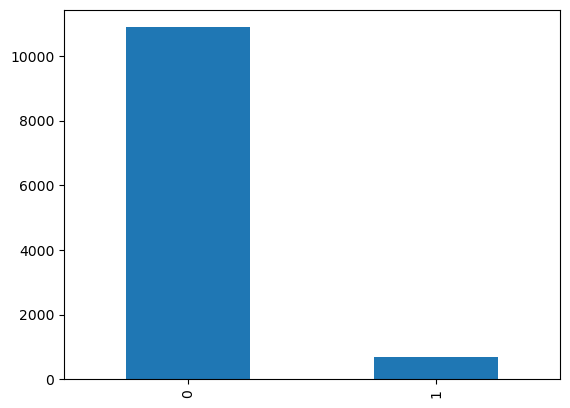

In [12]:
p = df['FraudFound_P'].value_counts()
print(p)
df['FraudFound_P'].value_counts().plot.bar()

#### I decided to take a closer look at fraud and no fraud claims with the Age and ClaimSize features, since they resulted in interesting distribtions.

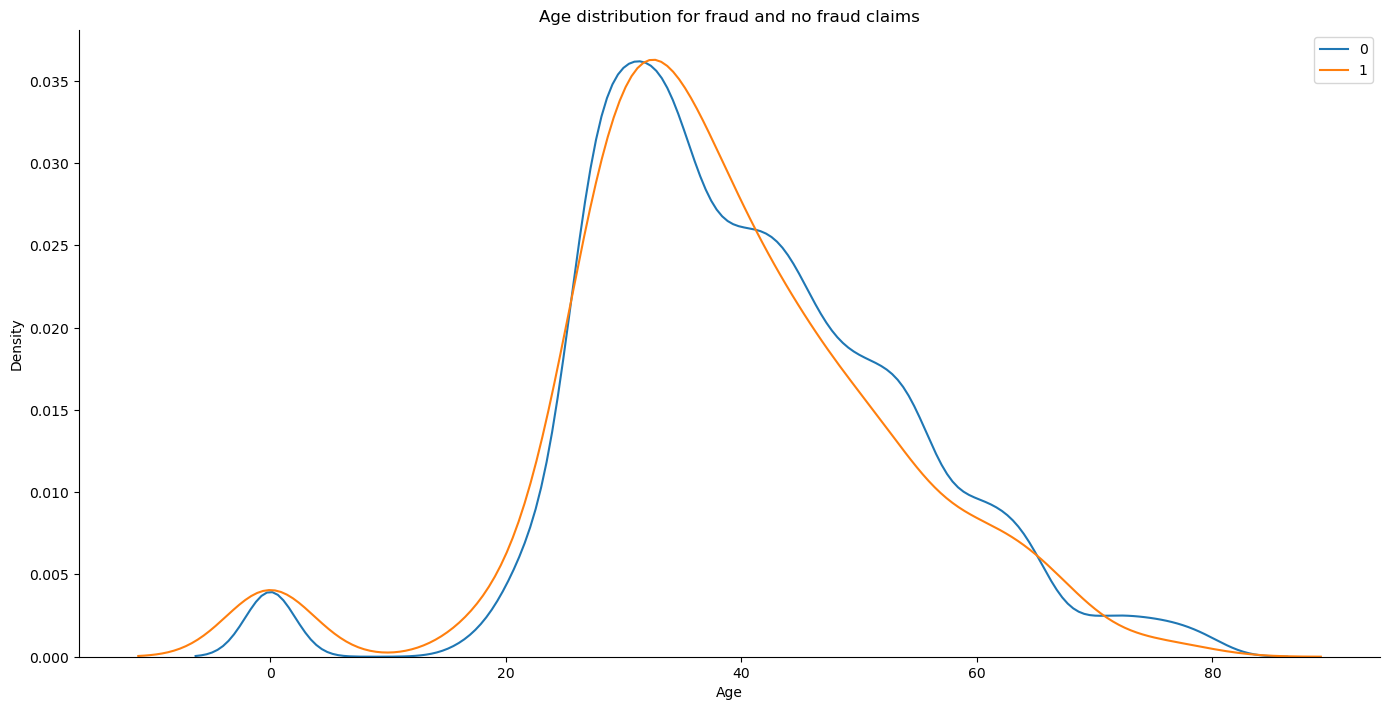

In [13]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'Age')
plt.title('Age distribution for fraud and no fraud claims')
plt.legend()
plt.show()

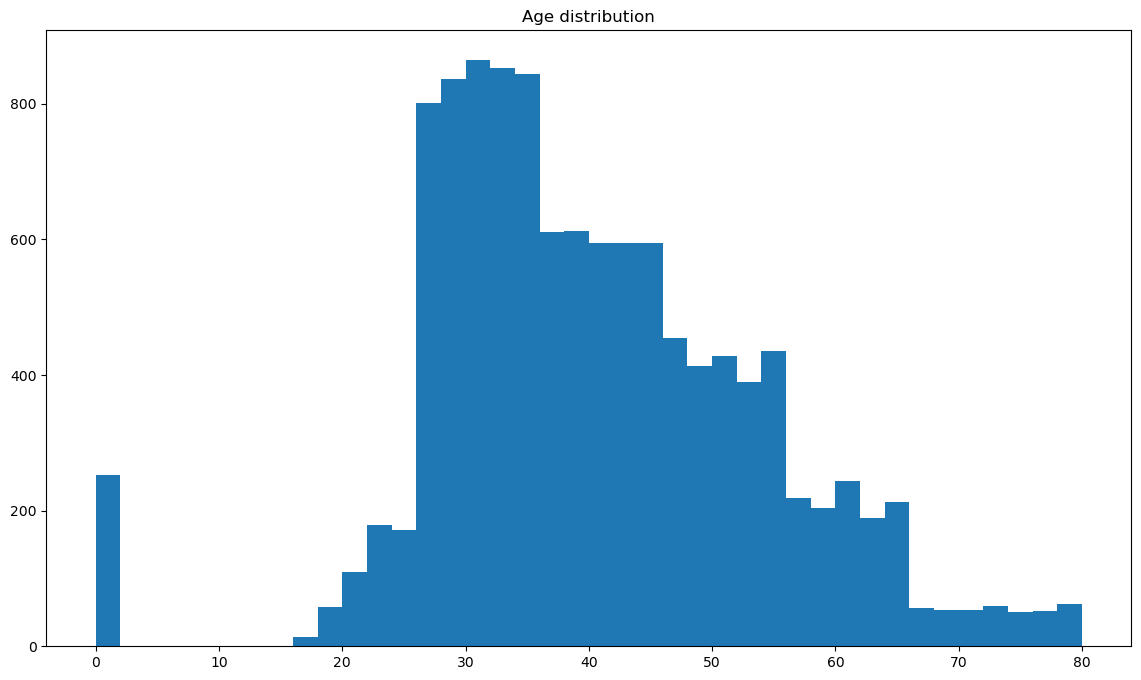

In [14]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Age'], bins = 40)   
plt.title('Age distribution')
plt.show()

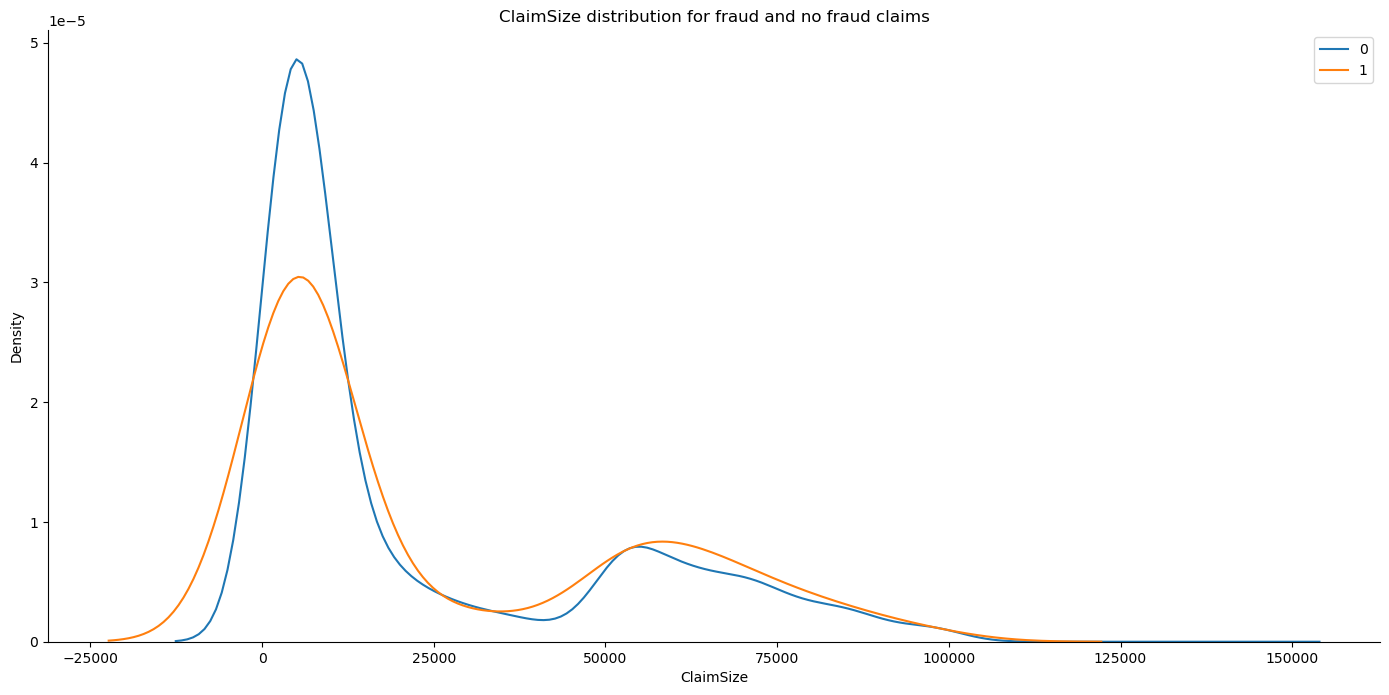

In [15]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

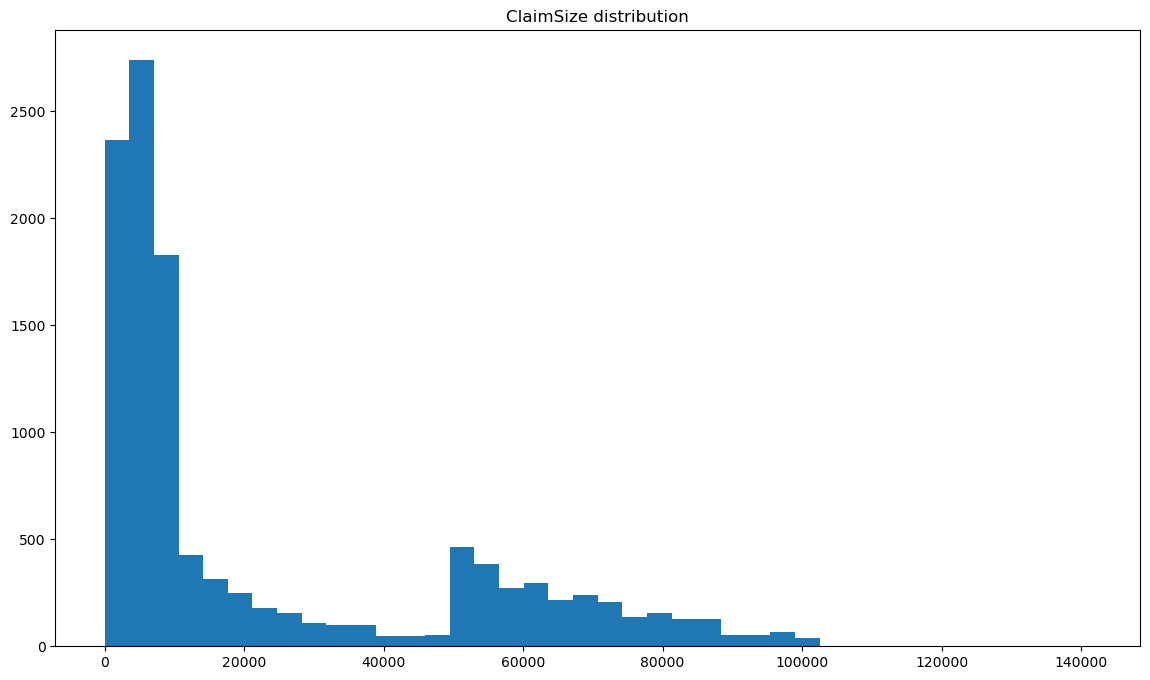

In [16]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['ClaimSize'], bins = 40)    
plt.title('ClaimSize distribution')
plt.show()

### Below are tables of fraud rates for each non-numeric feature

In [17]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.086,70
Ford,0.074,338
Honda,0.062,2159
Toyota,0.061,2317
Chevrolet,0.060,1253
Mercury,0.059,68


In [18]:
fraud_rate_area = df.groupby('AccidentArea').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_area.columns = ['FraudRate', '#']
fraud_rate_area = fraud_rate_area.apply(lambda x: round(x, 3))
fraud_rate_area.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AccidentArea,,
Rural,0.081,1209
Urban,0.057,10356


In [19]:
cross_tab('AccidentArea', 'FraudFound_P')

FraudFound_P,0,1
AccidentArea,,
Rural,1111,98
Urban,9769,587


In [37]:
fraud_rate_gender = df.groupby('Sex').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_gender.columns = ['FraudRate', '#']
fraud_rate_gender = fraud_rate_gender.apply(lambda x: round(x, 3))
fraud_rate_gender.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Sex,,
Male,0.063,9768
Female,0.041,1797


In [21]:
cross_tab('Sex','FraudFound_P')

FraudFound_P,0,1
Sex,,
Female,1724,73
Male,9156,612


In [22]:
fraud_rate_status = df.groupby('MaritalStatus').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_status.columns = ['FraudRate', '#']
fraud_rate_status = fraud_rate_status.apply(lambda x: round(x, 3))
fraud_rate_status.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
MaritalStatus,,
Widow,0.095,21
Married,0.060,7986
Single,0.057,3497
Divorced,0.049,61


In [23]:
fraud_rate_policy = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_policy.columns = ['FraudRate', '#']
fraud_rate_policy = fraud_rate_policy.apply(lambda x: round(x, 3))
fraud_rate_policy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Utility - All Perils,0.131,251
Sport - Collision,0.130,262
Utility - Collision,0.125,24
Sedan - All Perils,0.100,3067
Sedan - Collision,0.067,4186
Sedan - Liability,0.007,3742
Sport - All Perils,0.000,19
Sport - Liability,0.000,1
Utility - Liability,0.000,13


In [24]:
fraud_rate_fault = df.groupby('Fault').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_fault.columns = ['FraudRate', '#']
fraud_rate_fault = fraud_rate_fault.apply(lambda x: round(x, 3))
fraud_rate_fault.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Fault,,
Policy Holder,0.078,8394
Third Party,0.009,3171


In [25]:
cross_tab('Fault', 'FraudFound_P')

FraudFound_P,0,1
Fault,,
Policy Holder,7737,657
Third Party,3143,28


In [26]:
fraud_rate_cat = df.groupby('VehicleCategory').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cat.columns = ['FraudRate', '#']
fraud_rate_cat = fraud_rate_cat.apply(lambda x: round(x, 3))
fraud_rate_cat.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehicleCategory,,
Utility,0.125,288
Sedan,0.081,7253
Sport,0.015,4024


In [27]:
fraud_rate_price = df.groupby('VehiclePrice').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_price.columns = ['FraudRate', '#']
fraud_rate_price = fraud_rate_price.apply(lambda x: round(x, 3))
fraud_rate_price.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehiclePrice,,
more than 69000,0.088,1605
less than 20000,0.082,800
40000 to 59000,0.060,349
20000 to 29000,0.054,6112
60000 to 69000,0.051,59
30000 to 39000,0.047,2640


In [28]:
fraud_rate_pastclaims = df.groupby('PastNumberOfClaims').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pastclaims.columns = ['FraudRate', '#']
fraud_rate_pastclaims = fraud_rate_pastclaims.apply(lambda x: round(x, 3))
fraud_rate_pastclaims.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PastNumberOfClaims,,
none,0.079,3286
1,0.062,2675
2 to 4,0.050,4140
more than 4,0.036,1464


In [29]:
fraud_rate_carage = df.groupby('AgeOfVehicle').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_carage.columns = ['FraudRate', '#']
fraud_rate_carage = fraud_rate_carage.apply(lambda x: round(x, 3))
fraud_rate_carage.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgeOfVehicle,,
new,0.091,285
3 years,0.090,100
4 years,0.085,176
6 years,0.064,2581
5 years,0.061,990
7 years,0.059,4388
more than 7,0.049,2993
2 years,0.038,52


In [30]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.060  11193
                  Yes                 0.048     42
Yes               No                  0.043    304
                  Yes                 0.000     26

In [31]:
fraud_rate_agent = df.groupby('AgentType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_agent.columns = ['FraudRate', '#']
fraud_rate_agent = fraud_rate_agent.apply(lambda x: round(x, 3))
fraud_rate_agent.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgentType,,
External,0.060,11394
Internal,0.023,171


In [32]:
fraud_rate_cars = df.groupby('NumberOfCars').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cars.columns = ['FraudRate', '#']
fraud_rate_cars = fraud_rate_cars.apply(lambda x: round(x, 3))
fraud_rate_cars.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
NumberOfCars,,
2 vehicles,0.066,559
3 to 4,0.066,288
1 vehicle,0.059,10698
5 to 8,0.053,19
more than 8,0.000,1


In [33]:
fraud_rate_bpolicy = df.groupby('BasePolicy').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_bpolicy.columns = ['FraudRate', '#']
fraud_rate_bpolicy = fraud_rate_bpolicy.apply(lambda x: round(x, 3))
fraud_rate_bpolicy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
BasePolicy,,
All Perils,0.102,3337
Collision,0.071,4472
Liability,0.007,3756


#### Outlier Analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'WeekOfMonth'),
  Text(2, 0, 'WeekOfMonthClaimed'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'FraudFound_P'),
  Text(5, 0, 'PolicyNumber'),
  Text(6, 0, 'RepNumber'),
  Text(7, 0, 'Deductible'),
  Text(8, 0, 'DriverRating'),
  Text(9, 0, 'Year'),
  Text(10, 0, 'ClaimSize')])

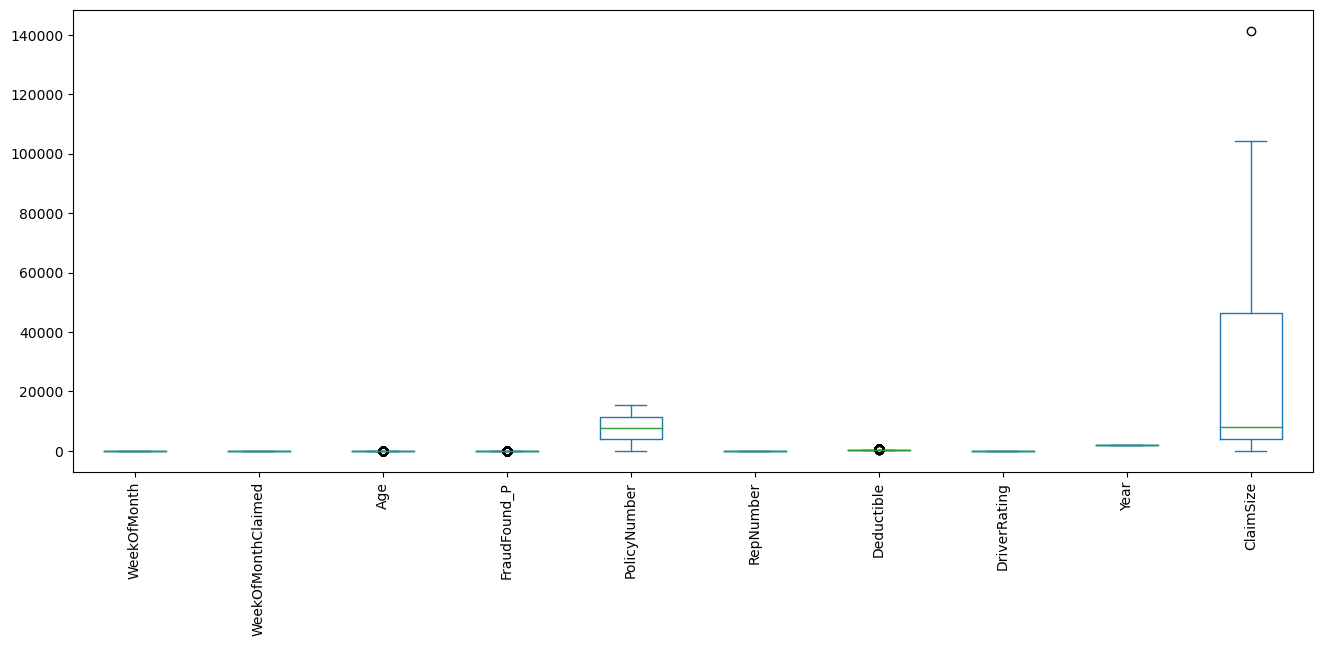

In [34]:
df.plot.box(figsize = (16,6), showfliers=True)
plt.xticks(rotation = 90)

<AxesSubplot:>

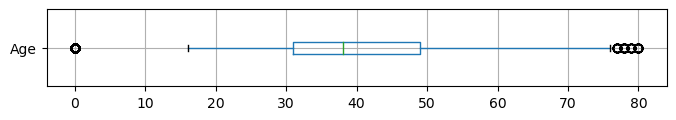

In [26]:
df.boxplot(column = ['Age'], figsize = (8,1), showfliers=True, vert=False)

<AxesSubplot:>

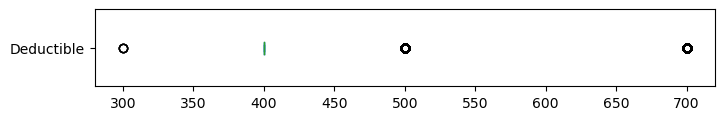

In [27]:
df.plot.box(column = ['Deductible'], figsize = (8,1), showfliers=True, vert=False)

Text(0.5, 1.0, 'Correlation matrix for numerical features')

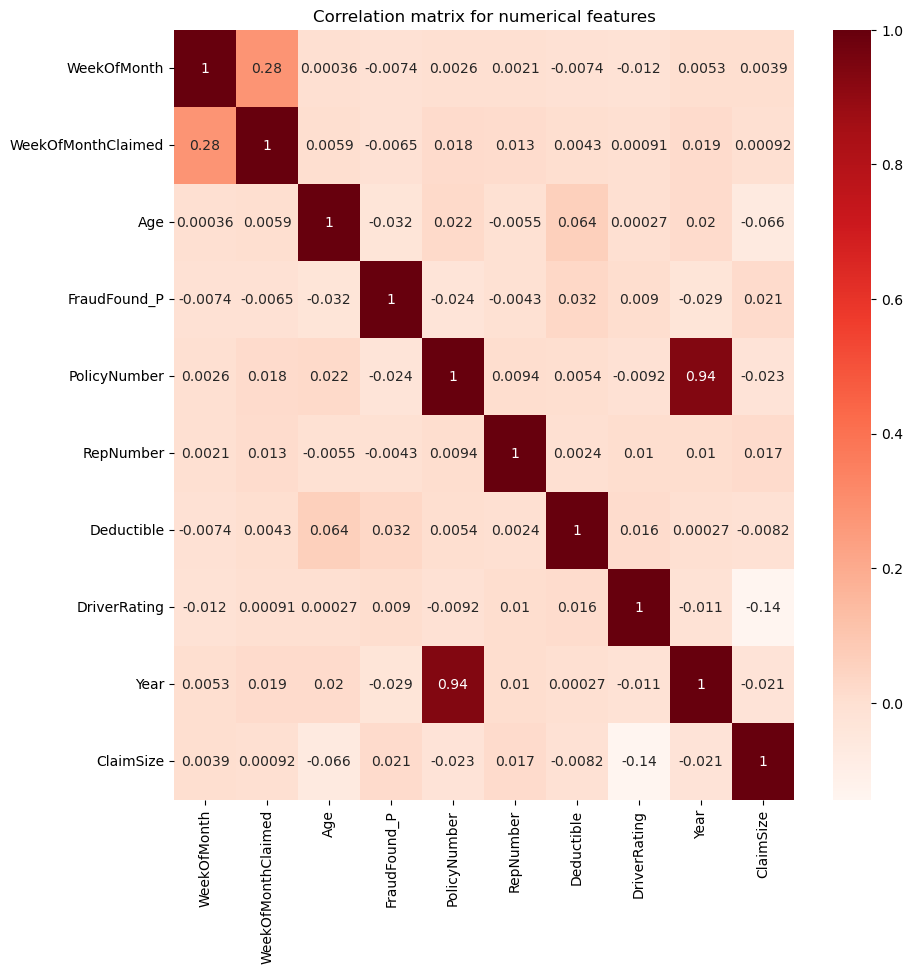

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.title('Correlation matrix for numerical features')

# Pre-Processing and Training Data Development

In [36]:
df_copy = df.copy()

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11565 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [38]:
months = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9, 
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
          }
months_proc = lambda x: months.get(x, 0)

df_copy['Month'] = df_copy['Month'].apply(months_proc)
df_copy['MonthClaimed'] = df_copy['MonthClaimed'].apply(months_proc)

In [39]:
days_of_week = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
          }
days_of_week_proc = lambda x: days_of_week.get(x, 0)

df_copy['DayOfWeek'] = df_copy['DayOfWeek'].apply(days_of_week_proc)
df_copy['DayOfWeekClaimed'] = df_copy['DayOfWeekClaimed'].apply(days_of_week_proc)

In [40]:
vehicle_price = {
    'less than 20000': 1,
    '20000 to 29000' : 2,
    '30000 to 39000' : 3,
    '40000 to 59000' : 4,
    '60000 to 69000' : 5,
    'more than 69000': 6,
          }
vehicle_price_proc = lambda x: vehicle_price.get(x, 0)

df_copy['VehiclePrice'] = df_copy['VehiclePrice'].apply(vehicle_price_proc)

In [41]:
vehicle_age = {
    'new'         : 0.5,
    '2 years'     : 2,
    '3 years'     : 3,
    '4 years'     : 4,
    '5 years'     : 5,
    '6 years'     : 6,
    '7 years'     : 7,
    'more than 7' : 8.5,
          }
vehicle_age_proc = lambda x: vehicle_age[x]

df_copy['AgeOfVehicle'] = df_copy['AgeOfVehicle'].apply(vehicle_age_proc)

In [42]:
age_variants = {
    '16 to 17'     : 1,
    '18 to 20'     : 2,
    '21 to 25'     : 3,
    '26 to 30'     : 4,
    '31 to 35'     : 5,
    '36 to 40'     : 6,
    '41 to 50'     : 7,
    '51 to 65'     : 8,
    'over 65'      : 9,
          }
age_proc = lambda x: age_variants[x]

df_copy['AgeOfPolicyHolder'] = df_copy['AgeOfPolicyHolder'].apply(age_proc)

In [43]:
df_copy['Age'] = df_copy['Age'].fillna(0)
df_copy['DriverRating'] = df_copy['DriverRating'].fillna(0)

In [44]:
df_copy[df_copy.isnull().any(axis=1)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize


In [45]:
df_copy.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,Honda,Urban,2,1,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,6,0,1,12,300,1.0,more than 30,more than 30,none,3.0,4,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,Honda,Urban,1,1,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,6,0,2,15,400,4.0,more than 30,more than 30,none,6.0,5,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,Honda,Urban,4,11,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,6,0,3,7,400,3.0,more than 30,more than 30,1,7.0,7,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,2,0,4,4,400,2.0,more than 30,more than 30,1,8.5,8,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,Honda,Urban,1,2,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,6,0,7,14,400,1.0,more than 30,more than 30,1,7.0,6,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [95]:
df_copy = df_copy.drop('PolicyNumber', axis=1)

In [96]:
def dummification(df):
    dummy_df = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    df_out = pd.concat([df.drop(columns = object_cols), dummy_df], axis = 1)
    return df_out.sort_index(ascending=False, axis=1)
        

def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + str(col) + ': ' + str(name) for name in df_dummy.columns]
    return df_dummy

df_copy = dummification(df_copy)
df_copy.head()

,dum: WitnessPresent: Yes,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: none,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,cluster_labels,Year,WeekOfMonthClaimed,WeekOfMonth,VehiclePrice,RepNumber,MonthClaimed,Month,FraudFound_P,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1994,1,5,6,12,1,12,0,1.0,300,2,3,55526.069421,3.0,4,21.0
1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1994,4,3,6,15,1,1,0,4.0,400,1,3,59294.455571,6.0,5,34.0
2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,2,1994,2,5,6,7,11,10,0,3.0,400,4,5,71756.941320,7.0,7,47.0
3,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,3,1994,1,2,2,4,7,6,0,2.0,400,5,6,7584.153493,8.5,8,65.0
4,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,2,1994,3,1,6,14,2,2,0,1.0,400,1,6,98545.374339,7.0,6,36.0


# Modeling

### Hypothesis
#### H0 : Given data is fraudulent
#### H1 : Given data is genuine

In [97]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF, KernelPCA
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import umap
import warnings
from sklearn.cluster import KMeans, MeanShift, DBSCAN
warnings.filterwarnings('ignore')

###  Scaling

In [98]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(df_copy.drop('FraudFound_P', axis=1))
y_scaler = df['FraudFound_P'].values

### PCA

In [99]:
pca = PCA(n_components=2, random_state = 1)
df_pca = pca.fit_transform(X_scaler)

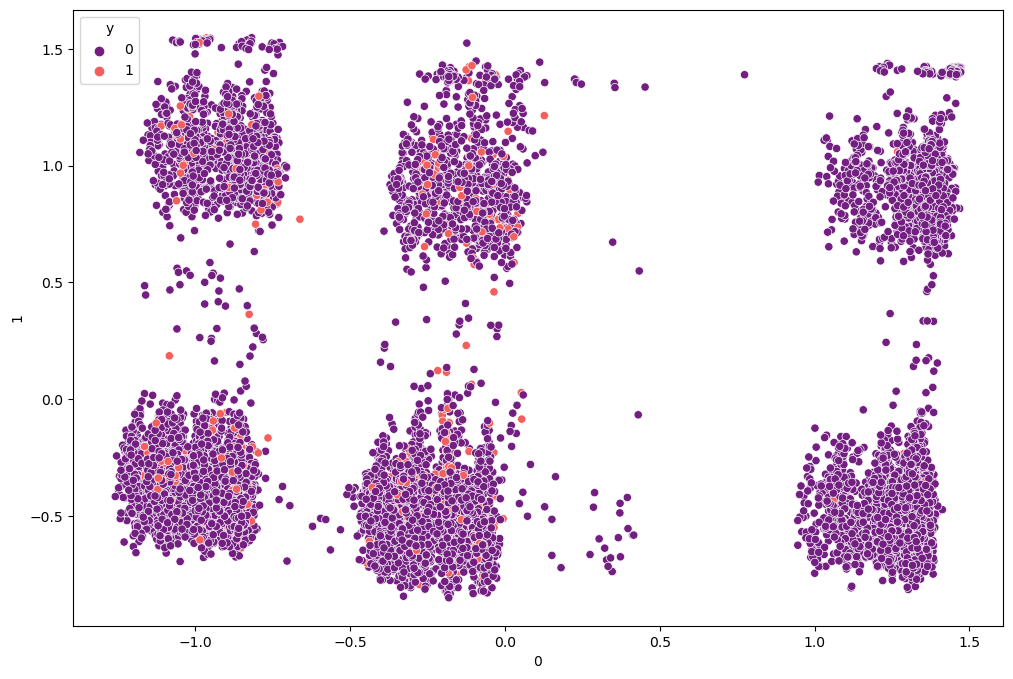

In [100]:
df_vis = pd.DataFrame(df_pca)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

### Singular Value Decomposition

In [101]:
svd = TruncatedSVD(n_components=2, random_state = 1)
df_svd = svd.fit_transform(X_scaler)

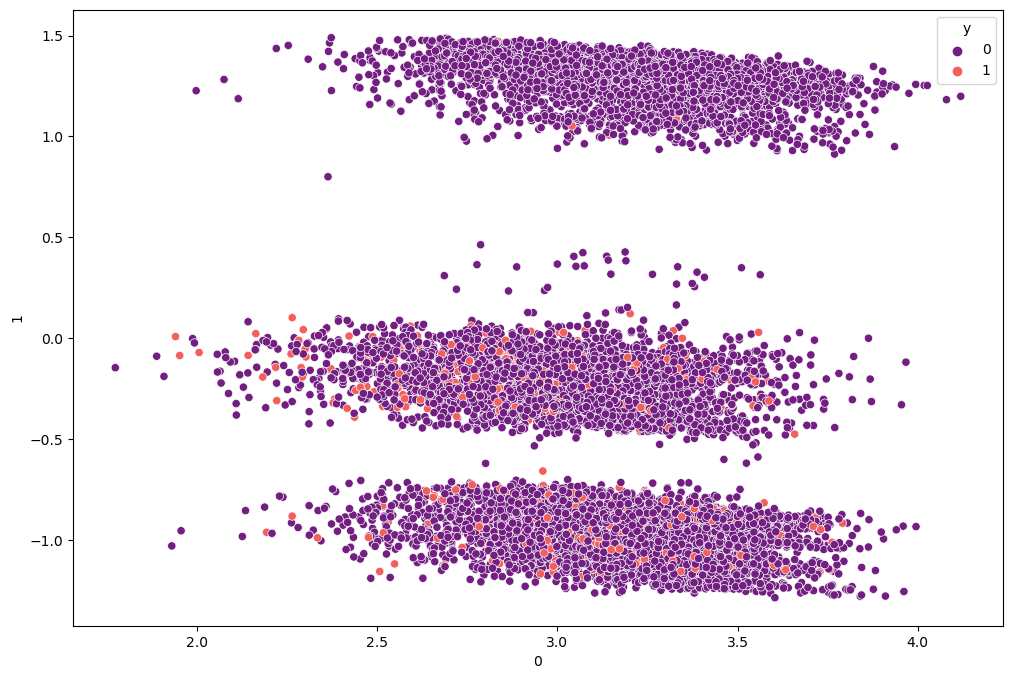

In [102]:
df_vis = pd.DataFrame(df_svd)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

### Non-negative Matrix Factorization (NMF)

In [103]:
nmf = NMF(n_components=2, random_state = 1)
df_nmf = nmf.fit_transform(X_scaler)

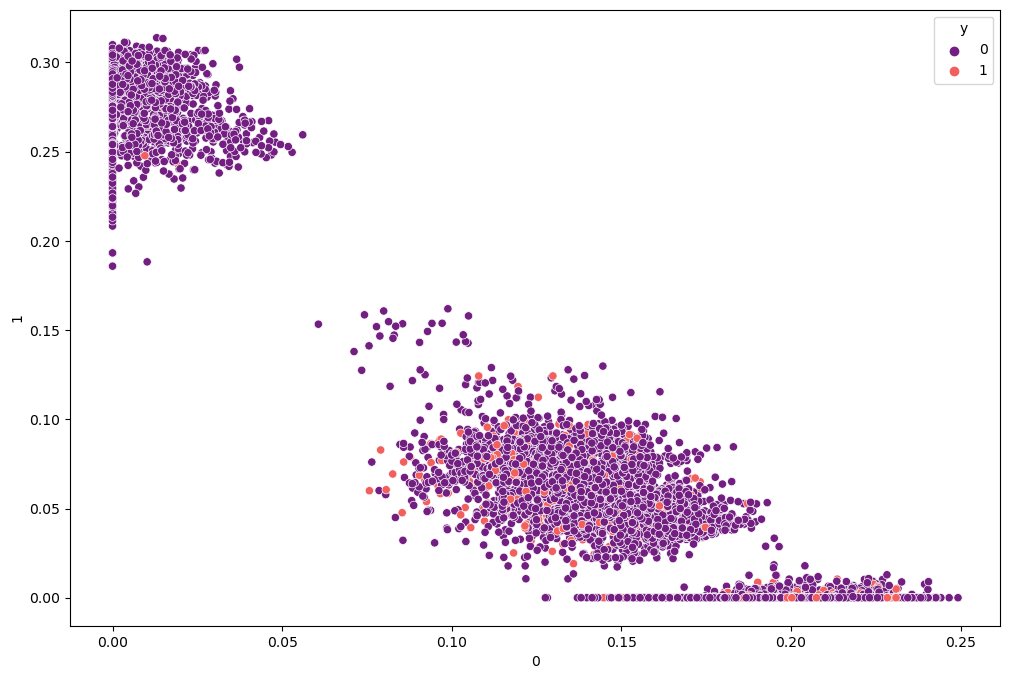

In [104]:
df_vis = pd.DataFrame(df_nmf)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

### t-distributed Stochastic Neighbor Embedding

In [105]:
tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(X_scaler)

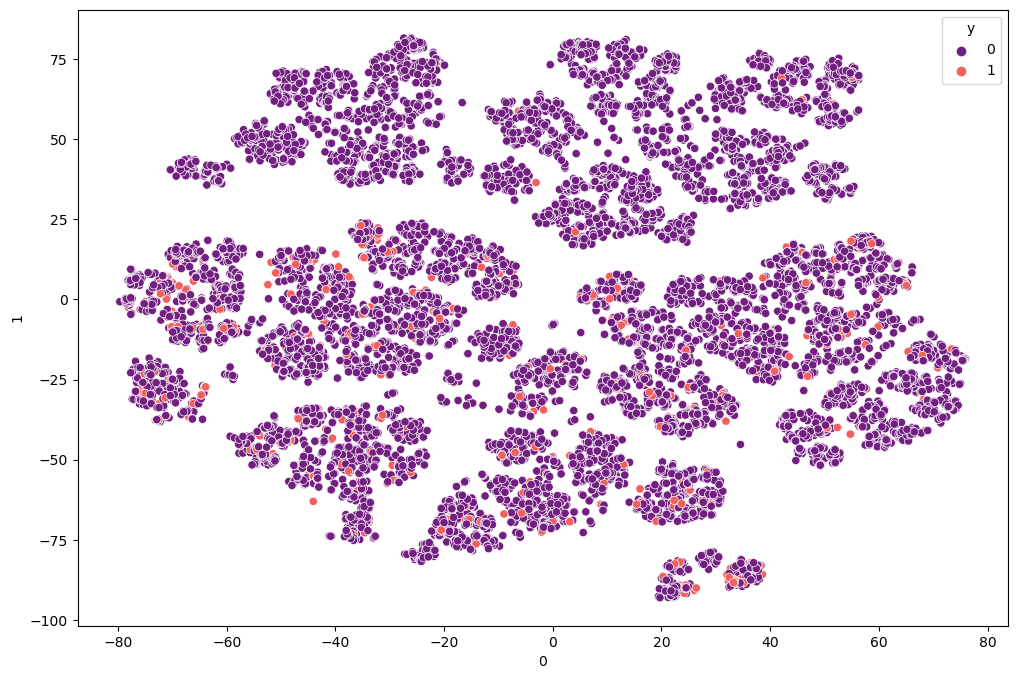

In [106]:
df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

### Uniform Manifold Approximation and Projection (UMAP)

In [107]:
umap_m = umap.UMAP(
    n_components=2, 
    random_state=1, 
    n_neighbors=5    
)
df_umap = umap_m.fit_transform(X_scaler)

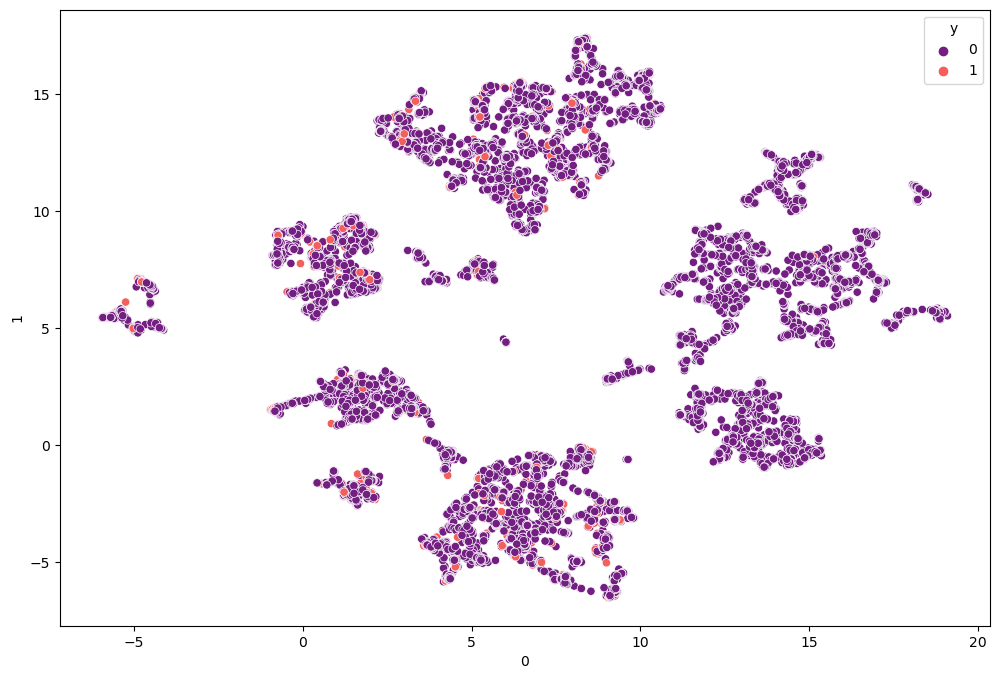

In [108]:
df_vis = pd.DataFrame(df_umap)
df_vis['y'] = y_scaler

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

### Clustering

In [109]:
dbscan = DBSCAN(eps = 0.5 , n_jobs = -1)
dbscan.fit(df_umap) 

DBSCAN(n_jobs=-1)

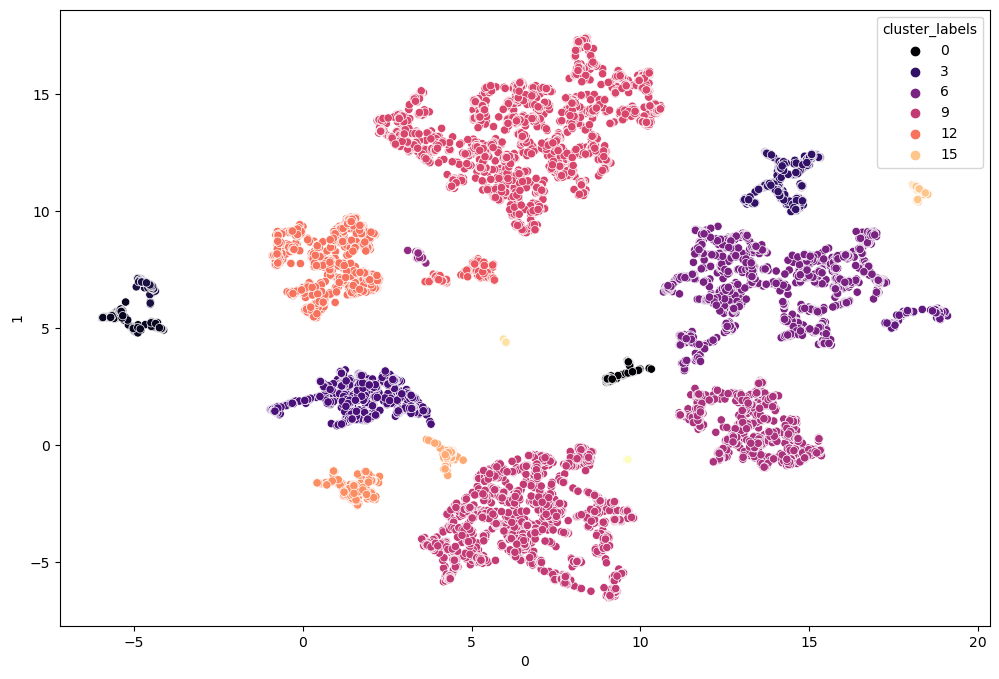

In [110]:
df_vis['cluster_labels'] = dbscan.labels_
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'cluster_labels',  palette = 'magma')
plt.show()

In [111]:
df_c = df_copy
df_c['cluster_labels'] = dbscan.labels_

In [114]:
cluster_pivot = df_c[
    ['cluster_labels', 'ClaimSize', 'AgeOfVehicle', 'Age', 
      'Month', 'dum: WitnessPresent: Yes', 'FraudFound_P']
    ].groupby(
    by='cluster_labels', 
    as_index=False
).agg({
    'ClaimSize'                 :'mean', 
    'AgeOfVehicle'              :'mean', 
    'Age'                       :'mean', 
    'Month'                     :'mean', 
    'dum: WitnessPresent: Yes'  :'mean', 
    'FraudFound_P'              :'mean'
})

cluster_pivot.columns = [
    'Cluster','Mean ClaimSize', 'Mean AgeOfVehicle', 
    'Mean Age', 'Mean Month', 'WitnessPresent rate', 
    'Fraud rate'
]

cluster_pivot = cluster_pivot.apply(lambda x: round(x, 2))
cluster_pivot.sort_values(by = 'Fraud rate', ascending = False)

,Cluster,Mean ClaimSize,Mean AgeOfVehicle,Mean Age,Mean Month,WitnessPresent rate,Fraud rate
2,2,66861.34,7.02,44.88,6.41,0.01,0.17
4,4,20480.84,5.57,30.83,6.17,0.01,0.12
13,13,62903.65,7.39,45.17,6.76,0.01,0.12
9,9,16936.12,7.27,45.47,6.27,0.01,0.10
1,1,67226.49,5.58,30.61,6.26,0.03,0.10
7,7,68505.07,0.58,1.62,4.96,0.00,0.09
10,10,18334.47,7.14,42.71,6.62,0.00,0.07
11,11,15529.45,6.78,39.34,6.66,0.01,0.07
12,12,15292.10,5.97,31.51,6.60,0.01,0.06
14,14,18837.06,7.16,46.41,6.77,0.00,0.06


In [116]:
df[df_c['cluster_labels'] == 2]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339
37,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,21.0,Policy Holder,Sport - Collision,Sport,more than 69000,1,53,4,400,4.0,more than 30,more than 30,none,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,61043.348012
60,Feb,2,Friday,Honda,Urban,Tuesday,Feb,3,Female,Married,47.0,Third Party,Sport - Collision,Sport,more than 69000,0,78,12,400,3.0,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,83871.799506
146,Dec,3,Thursday,Honda,Urban,Monday,Jan,1,Male,Married,39.0,Policy Holder,Sport - Collision,Sport,more than 69000,1,195,13,400,3.0,more than 30,more than 30,none,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision,63282.714368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,Sep,1,Tuesday,Honda,Urban,Wednesday,Sep,1,Male,Married,52.0,Third Party,Sport - Collision,Sport,more than 69000,0,14421,13,400,2.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1996,Collision,50429.702517
10845,Dec,3,Thursday,Honda,Urban,Monday,Dec,3,Male,Married,45.0,Third Party,Sport - Collision,Sport,more than 69000,0,14468,14,400,4.0,more than 30,more than 30,1,more than 7,36 to 40,Yes,No,External,none,no change,1 vehicle,1996,Collision,59496.463260
11296,Oct,3,Monday,Honda,Urban,Tuesday,Oct,3,Male,Married,66.0,Policy Holder,Sport - Collision,Sport,more than 69000,1,15066,2,400,2.0,more than 30,more than 30,none,6 years,over 65,No,No,External,none,no change,1 vehicle,1996,Collision,53588.105356
11451,Dec,1,Friday,Honda,Urban,Monday,Dec,1,Male,Married,55.0,Third Party,Sport - Collision,Sport,more than 69000,0,15261,4,400,3.0,more than 30,more than 30,1,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Collision,63150.597838


### Split

In [117]:
data, validation_df  = train_test_split(df_copy,
                                test_size=0.3,
                                random_state = 101)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('FraudFound_P', axis = 1), 
                                                    data['FraudFound_P'], 
                                                    test_size=0.3, 
                                                    random_state=101)

In [119]:
def eval_result(model, X_test, y_test, validation = False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pred = model.predict(X_test)
        print(classification_report(y_test, pred, target_names = ['Not Fraud', 'Fraud']))
        display(pd.DataFrame(confusion_matrix(y_test, pred), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))
        
        if hasattr(model, 'feature_importances_') and not validation:
            features = pd.DataFrame({
                'Variable'  :X_test.columns,
                'Importance':model.feature_importances_
            })
            features.sort_values('Importance', ascending=False, inplace=True)
            display(features.head(20))

## Models

### Logistic Regression

In [120]:
lgmodel = LogisticRegression(
    solver='lbfgs', 
    class_weight={0:1.0, 1:9.5},
    n_jobs = -1,
    random_state = 101
)
lgmodel.fit(X_train, y_train)
eval_result(lgmodel, X_test, y_test)

              precision    recall  f1-score   support

   Not Fraud       0.94      0.87      0.90      2277
       Fraud       0.10      0.21      0.13       152

    accuracy                           0.83      2429
   macro avg       0.52      0.54      0.52      2429
weighted avg       0.89      0.83      0.86      2429



/Users/jenniferrobbins/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted Not Fraud,Predicted Fraud
Not Fraud,1975,302
Fraud,120,32


### Decision Tree

In [121]:
dtc = DecisionTreeClassifier(random_state = 101)
dtc.fit(X_train, y_train)
eval_result(dtc, X_test, y_test)

              precision    recall  f1-score   support

   Not Fraud       0.95      0.93      0.94      2277
       Fraud       0.19      0.24      0.21       152

    accuracy                           0.89      2429
   macro avg       0.57      0.59      0.57      2429
weighted avg       0.90      0.89      0.89      2429



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2115,162
Fraud,115,37


,Variable,Importance
72,ClaimSize,0.137689
75,Age,0.092067
65,RepNumber,0.083032
66,MonthClaimed,0.051052
67,Month,0.050599
70,DayOfWeekClaimed,0.049348
73,AgeOfVehicle,0.041065
63,WeekOfMonth,0.035692
44,dum: Fault: Third Party,0.034311
71,DayOfWeek,0.031736


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
rfr = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'bootstrap': [True]
}

cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200]})

In [123]:
rfc1=RandomForestClassifier(n_estimators= 50, max_depth=15, bootstrap=True, random_state=42)

rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

### Random Forest

In [124]:
y_pred = rfc1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.9374228077398106
Confusion matrix:
 [[2277    0]
 [ 152    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2277
           1       0.00      0.00      0.00       152

    accuracy                           0.94      2429
   macro avg       0.47      0.50      0.48      2429
weighted avg       0.88      0.94      0.91      2429



### Best model: Random Forest